#逻辑回归与最大似然

逻辑回归解决的是分类问题(应变量为离散型变量，自变量即可以是连续型，也可以是离散型)，最大似然是一种通用的解决概率问题的思想，两者之间的关系是线性回归和最小二乘法的关系。逻辑回归得到的是一个分割面，可以把数据一分为二

#1. 基本概念

0-1事件就是一个事件发生的概率只有两种可能，那么如果我们假设1发生的概率为p，那么0发生的概率就是1-p，用一个统一个公式来表示，就是$P\{X=x\}=p^x(1-p)^{1-x}$,定义事件1发生的几率为$odds=\frac{p}{1-p}$,对数几率z=ln(odds),那么可以推到出如下公式：$P\{X=x\}=\frac{1}{1+e^{-z}}$

#2. 逻辑回归与线性回归

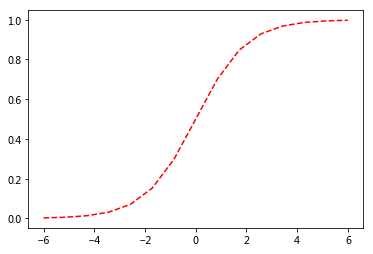

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math

lineX = np.linspace(-6,6, 15)
y=1/(1+np.e**(-lineX))

plt.figure(1, facecolor='white')
plt.plot(lineX, y, 'r--')
plt.show()

$\frac{\partial}{\partial\Theta_j}h_{\Theta}^\prime(x)=(\frac{1}{1+e^{-x}})(1-\frac{1}{1+e^{-x}})x_j$


#3. 最大似然估计-MLE

似然就是可能性，最大似然估计是在总体的分布类型已知的条件下所使用的一种参数估计方法。分布类型已知的意思就是，比如0-1事件，我们会认为0-1事件符合伯努利的，或者是0-1分布，或者是二项分布。最大似然的原理包括：
- 概率大的事件在一次观测中更容易发生
- 再一次观测中发生了的事件其概率应该最大

似然函数就是联合概率公式，举例，比如说抽奖(抽中后放入),我们规定中奖的概率为p，那么10个人中有3个中奖，7个不中奖的似然函数，就是$P(x_1,x_2,...,x_{10})=p^3(1-p)^7$,那么最大似然估计就是说找到一个p的值，使得上面的结果最大，可知p=0.3，这个是符合预期的，因为10个人抽奖，3个人中奖的概率确实就是0.3


##3.1 完整定义

设总体X为离散型，其分布律为$P\{X=x\}=p(x;\Theta)$的形式已知，$\Theta$为待估参数。设$X={a_1，a_2,...,a_n}$为一组样本值，即事件${x_1,...x_n}$发生的联合概率密度函数为$L(\theta)=L(x_1,x_2,...,x_n;\theta)=\Pi_{i=1}^np(x_i;\theta),\theta\in\Theta$,$L(\Theta)$是关于$\Theta$的函数，成为似然函数。极大似然估计法就是在参数θ可能的取值范围内，选取函数$L(\Theta)$达到最大的参数$\Theta$

##3.2 最大似然估计的步骤

1. 由总体分布写出样本的联合分布律(离散型因变量-特征值是离散的)或联合概率密度(连续型因变量-特征值是连续的);即似然函数
2. 去对数似然：由于我们需要找到最大的那个$\Theta$,所以我们需要对似然函数求导，然后叫它等于0，可是一般来说似然函数求导以后，还是很难求出结果，比如抽奖的例子求导后是$3P^2 * 7(1-P)^6$，所以我们先对于似然函数求对数，可得$ln(L) = 3lnP + 7ln(1-p)$,这样就可以更好求导了
3. 对对数似然函数求导数，得到驻点(最大值点)
4. 用样本值带入最大值点的表达式，就得到参数的估计值

##3.3 逻辑回归